# PCA tutorial for Diodon (python)

This is an elementary tutorial for PCA with Diodon. This is a tutorial on both  

- the PCA as a method
- the implementation with `pydiodon`

## Why to run a PCA?

A PCA is relevent for answering some questions on a two dimensional array of scalars, with one entry being a set of individuals, or items, and the second being a set of variables, or features.   


Let us have $n$ items and $p$ variables. Let $i$ with $1 \leq i \leq n$ label the items, and $j$ with $1 \leq j \leq p$ label the variables, or features. The set of values of all variables for all items can be given as a matrix, denoted $A$, with $n$ rows and $p$ columns, where $a_{ij}$ is the value of feature $j$ for item $i$.   


Then, a row is an item, with the values of all features for this item, and a column is a feature, with the values of the feature over all items. It is important to note that the order of items or features is irrelevant: the analysis of $A$ by PCA does not depend on the order of rows and columns. This makes tricky but not impossible the use of PCA on time series for example (where column $j$ is he value of a same variable at time $j$) because the order of columns is crucial in such a context.  

There are three ways to present PCA, two of them being more detailed here (the third one is more algebraic, and less relevant for data analysis, even if it is behind the scene for any viewpoint).   

**The statistical viewpoint:** One is interested in the dependencies between the features, modeled for example by their correlations. In such an approach, each column (feature) is centered and scaled, producing matrix $A'$, and the variance-covariance matrix $C=A'^T A'$ is computed. If two features are highly correlated (like, for example, the temperatures in January and February in a set of $n$ meteorological stations in a temperate climate where the features are the average monthly temperatures), very few information is lost when replacing both features by their average. This means that the number of features (measured or built) necessary for describing the variability of monthly temperatures over the year is less than, here, 12, with a small loss. PCA is about finding a set of new features, as independent linear combinations of the measured ones, which reflect at best the variability of the (old) features over all items. If the number of new features (called the rank) is denoted $r$, if $\epsilon$ denotes the error in the approximation of $A$ by the dataset built from the new features denoted $\widetilde{A}$, and $\rho$ the quality of the approximation, we have
$$
\epsilon = \frac{\|A - \widetilde{A}\|}{\|A\|}, \qquad \rho = \frac{\|\widetilde{A}\|}{\|A\|}
$$
PCA provides a function $\rho=f(r)$ from which the analyst can select to privilege either the quality (large $r$, large $\rho$), or the compactness (small $r$, small $\rho$). By Pythagore theorem, we have $\epsilon^2 + \rho^2 = 1$.  

**The geometric viewpoint:** It is possible to associated to $A$ a point cloud denoted $\mathcal{A}$ of $n$ points in $\mathbf{R}^p$. Running a PCA of $A$ is finding an affine subspace $E_r$ of $\mathbf{R}^p$ of dimension $r$ such that the projection $\mathcal{A}'$ of $\mathcal{A}$ on $E_r$ is the closest to $\mathcal{A}$ over all the subspaces of dimension $r$ of $\mathbf{R}^p$.


### Some vocabulary and outcomes 

Vocabulary and outcomes are easier to present with the geometric viewpoint, more intuitive. Let $E_r$ be the $r-$dimensional affine space with best projection of $\mathcal{A}$. Let us assume for sake of simplicity that $E_r$ contains the origin $\{0\}$. It has a basis $(x_1, \ldots, x_r)$ with $x_j \in E_r \subset \mathbf{R}^p$.

- The basis vectors $(x_j)_j$ with $1 \leq j \leq r$ are called the *principal axis*. Each $x_j$ is a linear combination of the "old" axis. A new feature is associated to each principal axis, which is a linear combination of the old features. The $p \times r$ matrix with principal axis $x_j$ at column $j$ is denoted $V$.

- Let $a_{i*}$ be a point in $\mathcal{A}$ (associated to item $i$, row $i$ of $A$). It is projected as $\widetilde{a}_{i*}$ on $E_r$. Its projection has coordinates in the basis of principal axis. Such coordinates are called the *principal components* at rank $r$ of $A$. The $n \times r$ matrix with $\widetilde{a}_{i*}$ at row $i$ is denoted $Y$. 




## Simple example for geometric viewpoint 

This is a toy example, found in any tutorial.   

### Building a toy point cloud

Let us build a set of $n$ points in $\mathbf{R}^2$, randomly, with Gaussian distribution along $x$ axis, Gaussian projection with a scaling coefficient $\alpha$ along the $y$ axis, followed by a anti-clockwise rotation or $\pi/4$. Here is the program to generate the point cloud.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### ------- points selected randomly

n = 1000         # number of points
alpha = .2      # scaling coefficient on y axis
x = np.random.randn(n)       # random points along x axis
y = alpha*np.random.randn(n) # random points along y axis with scaling 
xy = np.zeros((n,2))         # point $i$ (x_i,y_i) is row $i$ of xy, before rotation 
xy[:,0] = x                  
xy[:,1] = y

### ----- rotation 

theta = np.pi/4              # rotation angle
c = np.cos(theta)
s = np.sin(theta)
R = [[c, s],[-s, c]]         # matrix for rotation (transposed as it acts on rows of xy)
xy_rot = xy @ R              # point $i$ (x_i,y_i) is row $i$ of xy_rot, after rotation 


### Plotting the toy point cloud in "old" basis

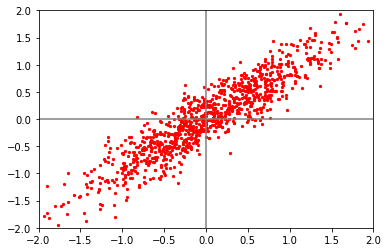

In [2]:
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.hlines(y=0, xmin=-2, xmax=2, colors="grey")
plt.vlines(x=0, ymin=-2, ymax=2, colors="grey")
plt.scatter(xy_rot[:,0], xy_rot[:,1], c="red", s=5)
plt.show()

### Plotting principal axis

In the plot above, points in point cloud $\mathcal{A}$ are in red, and axis (horizontal for first feature, vertical for second feature) are in grey. In plot below, the principal axis are colored in cyan, but still in the frame of "old" features. (They should be orthogonal, and are not because in matplotlib, when option axis = 'scaled' is not selected, circles are drawn as ellipses).

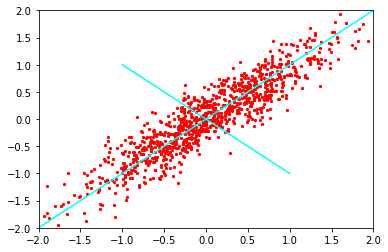

In [3]:
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot([-2,2],[-2,2], c="cyan")
plt.plot([-1,1],[1,-1], c="cyan")
plt.scatter(xy_rot[:,0], xy_rot[:,1], c="red", s=5)
plt.show()

In next plot, the point cloud is plotted in the frame of principal axis. 

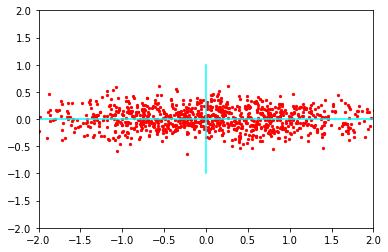

In [4]:
R_inv =  [[c, -s],[s, c]] 
xy_new = xy_rot @ R_inv
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot([-2,2],[0,0], c="cyan")
plt.plot([0,0],[1,-1], c="cyan")
plt.scatter(xy_new[:,0], xy_new[:,1], c="red", s=5)
plt.show()

## Calculation of principal axis and components

Before presenting the calculation, some basic elements on eigenvectors and eigenvalues of a matrix should be recalled.

#### Eigenvalues and eigenvectors of a matrix, singular values

Let $M$ be a square matrix, $n \times n$. An eigenvector $u$ of $M$ associated to the eigenvalue $\lambda \in \mathbf{C}$ is a non null vector $u$ such that $Mu = \lambda u$. If $M$ is symmetric, then all its eigenvalues are real, and the eigenvectors orthogonal. The eigenvalues can then be ordered with decreasing values
$$
\lambda_1 \geq \ldots \geq \lambda_n
$$
Let $A$ be a $n \times p$ real matrix with $n \geq p$. Its Singular Value Decomposition is writing $A$ as
$$
A = U \Sigma \, V^T
$$
with $U$ and orthonormal $n \times p$ matrix, $\Sigma$ a $p \times p$ diagonal matrix, and $V$ a $p \times p$ orthonormal matrix. Such a decomposition exists and is unique up to some elementary transformations. The elements in the diagonal of $\Sigma$ are called the singular values of $A$, and are $\geq 0$. let $C = A^T A$. The eigenvalues of $C$ are the quares of the singular values of $A$. Indeed
$$
C = A^T A = (U \Sigma \, V^T)^T (U \Sigma \, V^T) = V\Sigma U^T U \Sigma V^T = V \Sigma^2 V^T
$$
and
$$
CV = (V \Sigma^2 V^T)V = V \Sigma^2 V^T V = V \Sigma^2
$$
and the columns of $V$ are the eigenvectors of $C$ associated to eigenvalues $\lambda = \sigma^2$.  



#### Calculation

The calculation of principal axis and components can be done simultaneously for all ranks $r$. Indeed, a classical theorem in linear algebra (Eckart-Young theorem, but can be traced back earlier) states that if $r < r'$, then $E_r \subset E_{r'}$. The spaces $(E_r)_r$ for $1 \leq r \leq p$ are nested.  This theorem states as well that if $(v_j)_j$ is the set of eigenvectors of matrix $C=A^T A$ ordered according to the decreasing values of the corresponding eigenvalue, then $(v_1, \ldots, v_r)$ is an orthonormal basis of $E_r$. So, there are two ways to compute principal axis and components:

#### First way
1. Compute $C=A^T A$
2. Compute the eigenvalues and eigenvectors of $C$: $Cv = \lambda v$
3. Let $V$ be the $p \times p$ matrix with eigenvectors of $C$ as columns, orderd by decreasing corresponding egenvalues
4. Compute $Y=AV$, the matrix of principal components.

#### Second way
1. Compute the SVD of $A$: $A=U\Sigma V^T$
2. Compute $Y=AV = U\Sigma$

#### In both cases
1. $V$ $(p \times p)$ is the matrix with principal axis $v_j$ as column $j$
2. $Y$ $(n \times p)$ is the matrix of principal components, with $j-$th component over all items in column $j$

#### Quality of the approximation

Let $A_r$ be the best approximation of $A$ at rank $r$. It is possible to show that
$$
\left\{
  \begin{array}{lcl}
     \|A\|^2 &=& \sum_{j=1}^p \, \lambda_j \\
     \|A_r\|^2 &=& \sum_{j=1}^r \, \lambda_j \\
  \end{array}
\right.
$$
By Pythagore theorem, one has
$$
\|A^2\| = \|A_r\|^2 + \|A-A_r\|^2
$$
So, the quality of the approximation of $A$ by $A_r$ is
$$
\rho = \frac{\|A_r\|^2}{\|A\|^2} = \frac{\sum_{i \leq r} \lambda_i}{\sum_{j \leq p} \lambda_j} = \frac{\sum_{i \leq r} \sigma^2_i}{\sum_{j \leq p} \sigma^2_j} 
$$
and can be computed from the eigenvalues of $C$ or the singular values of $A$. 

## Output

The function `pca()` of `pydiodon` provides:
1. the list $L$ of eigenvalues of $C=A^T A$:  $L=(\lambda_1, \ldots, \lambda_p)$
2. the $(n \times p)$ matrix $Y$ of principal components
3. the $(p \times p)$ matrix $V$ of princial axis

## Implementation on the toy example

Matrix $A$ is `yy_rot`. Then

In [5]:
A = xy_rot
C = A.T @ A
print(C)

[[534.04594728 477.55002247]
 [477.55002247 504.11773056]]


Eigenvalues and principal axis are given, by (the longest part of the script is for ordering eigenvalues and corresponding eigenvectors)

In [6]:
# unsorted eigenvalues and eigenvectors
L, V = np.linalg.eig(C)

# sorted eigenvalues 
L_or = L.argsort()     # indices for increasing order
L_or = L_or[::-1]      # for decreasing order
L = L[L_or]            # eigenvalues, decreasing

# and eigenvectors
V = V[:, L_or]  

# printing the result

print("eigenvalues")
print(L)
print("\nprincipal axis")
print(V)

eigenvalues
[996.86625526  41.29742258]

principal axis
[[ 0.71809463 -0.69594548]
 [ 0.69594548  0.71809463]]


expected principal axis are $(\sqrt{2}/2, \sqrt{2}/2)$ and $(-\sqrt{2}/2, \sqrt{2}/2)$, or $(0.707, 0.707)$ and $(-0.707, 0.707)$.

and principal components by

In [7]:
Y = A @ V

and plotted

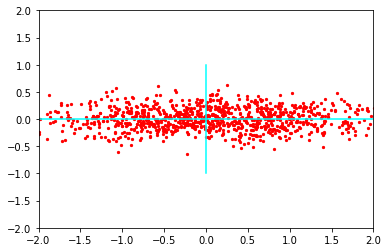

In [8]:
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot([-2,2],[0,0], c="cyan")
plt.plot([0,0],[1,-1], c="cyan")
plt.scatter(Y[:,0], Y[:,1], c="red", s=5)
plt.show()

which is very similar to the plot of the actual dataset in frame of principal axis (see "plotting prncipal axis"). 

## Advice

Useful companions to run this notebook are:   
- **why it works:** the presentation of the methods from a linear algebra viewpoint, available at https://arxiv.org/abs/2209.13597
- **how it works:** the online documentation of `pydiodon`, available at https://diodon.gitlabpages.inria.fr/pydiodon

# That's all, folks!